#### 2 formas de derivar una función
$f(x)= \dfrac{sen(x)e^{-cos(x)}x^5}{sen(10x^2)+4}$

In [10]:
import numpy as np
from scipy.misc import derivative
import sympy as smp

1. Derivada numérica (valor en un punto)

In [11]:
def f(x):
    return np.sin(x)*np.exp(-np.cos(x))*x**5 \
            /(np.sin(10*x**2)+4)

In [19]:
derivative(f,3, dx=1e-10)

5.39079891836991

2. Derivada simbólica

In [13]:
x = smp.symbols('x')
g = smp.sin(x)*smp.exp(-smp.cos(x))*x**5 \
    /(smp.sin(10*x**2)+4)

In [14]:
g

x**5*exp(-cos(x))*sin(x)/(sin(10*x**2) + 4)

Derivamos:

In [15]:
smp.diff(g,x)

-20*x**6*exp(-cos(x))*sin(x)*cos(10*x**2)/(sin(10*x**2) + 4)**2 + x**5*exp(-cos(x))*sin(x)**2/(sin(10*x**2) + 4) + x**5*exp(-cos(x))*cos(x)/(sin(10*x**2) + 4) + 5*x**4*exp(-cos(x))*sin(x)/(sin(10*x**2) + 4)

In [16]:
dgdx = smp.diff(g, x)

In [17]:
dgdx_numerica = smp.lambdify(x, dgdx, 'numpy')

In [18]:
dgdx_numerica(3)

5.390926709967626

### Seguimos con el caso simbólico

**Veamos más ejemplos**
$$ f(x) = e^{-a sen(x^2)}\cdot sen(b^x)\cdot ln\left(c \ \frac{sen^2 (x)}{x}\right) $$

Primero definimos todos los símbolos en sympy

In [20]:
x, a, b, c = smp.symbols('x a b c', real = True)

In [21]:
x**2+smp.exp(a)

x**2 + exp(a)

In [23]:
x, a, b, c = smp.symbols('x a b c', real=True)
f = smp.exp(-a*smp.sin(x**2))*smp.sin(b**x)*smp.log(c*smp.sin(x)**2 /x)

Calculamos la derivada usando *smp.diff(f, x)* dondoe $f$ es la función que se quiere derivar y $x$ es la variable respecto a la que se quiere derivar.

In [25]:
dfdx = smp.diff(f,x)
dfdx

-2*a*x*exp(-a*sin(x**2))*log(c*sin(x)**2/x)*sin(b**x)*cos(x**2) + b**x*exp(-a*sin(x**2))*log(b)*log(c*sin(x)**2/x)*cos(b**x) + x*(2*c*sin(x)*cos(x)/x - c*sin(x)**2/x**2)*exp(-a*sin(x**2))*sin(b**x)/(c*sin(x)**2)

Podemos hallar la derivada enésima $d^n f /dx^n$ colocando el argumento opcional al final: smp.diff(f,x,n)

In [27]:
d4fdx4 = smp.diff(f, x, 4)
d4fdx4

(24*a*b**x*x*(b**x*sin(b**x) - cos(b**x))*(2*cos(x) - sin(x)/x)*log(b)**2*cos(x**2)/sin(x) + 8*a*b**x*x*(b**(2*x)*cos(b**x) + 3*b**x*sin(b**x) - cos(b**x))*log(b)**3*log(c*sin(x)**2/x)*cos(x**2) + 24*a*b**x*x*(2*(2*cos(x) - sin(x)/x)*cos(x)/sin(x) + 2*(sin(x)**2 - cos(x)**2 + 2*sin(x)*cos(x)/x - sin(x)**2/x**2)/sin(x) - (2*cos(x) - sin(x)/x)/x)*log(b)*cos(b**x)*cos(x**2)/sin(x) + 16*a*b**x*x*(-2*a**2*x**2*cos(x**2)**3 - 6*a*x**2*sin(x**2)*cos(x**2) + 3*a*cos(x**2)**2 + 2*x**2*cos(x**2) + 3*sin(x**2))*log(b)*log(c*sin(x)**2/x)*cos(b**x) - 12*a*b**x*(b**x*sin(b**x) - cos(b**x))*(2*a*x**2*cos(x**2)**2 + 2*x**2*sin(x**2) - cos(x**2))*log(b)**2*log(c*sin(x)**2/x) + 24*a*b**x*(2*cos(x) - sin(x)/x)*(2*a*x**2*cos(x**2)**2 + 2*x**2*sin(x**2) - cos(x**2))*log(b)*cos(b**x)/sin(x) + 16*a*x*(2*cos(x) - sin(x)/x)*(-2*a**2*x**2*cos(x**2)**3 - 6*a*x**2*sin(x**2)*cos(x**2) + 3*a*cos(x**2)**2 + 2*x**2*cos(x**2) + 3*sin(x**2))*sin(b**x)/sin(x) + 16*a*x*(-3*(2*cos(x) - sin(x)/x)*cos(x)**2/sin(x)**2 - 4*(s

In [28]:
d5fdx5 = smp.diff(f, x, 5)
d5fdx5

(-60*a*b**x*x*(b**x*sin(b**x) - cos(b**x))*(2*(2*cos(x) - sin(x)/x)*cos(x)/sin(x) + 2*(sin(x)**2 - cos(x)**2 + 2*sin(x)*cos(x)/x - sin(x)**2/x**2)/sin(x) - (2*cos(x) - sin(x)/x)/x)*log(b)**2*cos(x**2)/sin(x) - 40*a*b**x*x*(b**x*sin(b**x) - cos(b**x))*(-2*a**2*x**2*cos(x**2)**3 - 6*a*x**2*sin(x**2)*cos(x**2) + 3*a*cos(x**2)**2 + 2*x**2*cos(x**2) + 3*sin(x**2))*log(b)**2*log(c*sin(x)**2/x) + 40*a*b**x*x*(2*cos(x) - sin(x)/x)*(b**(2*x)*cos(b**x) + 3*b**x*sin(b**x) - cos(b**x))*log(b)**3*cos(x**2)/sin(x) + 80*a*b**x*x*(2*cos(x) - sin(x)/x)*(-2*a**2*x**2*cos(x**2)**3 - 6*a*x**2*sin(x**2)*cos(x**2) + 3*a*cos(x**2)**2 + 2*x**2*cos(x**2) + 3*sin(x**2))*log(b)*cos(b**x)/sin(x) - 10*a*b**x*x*(b**(3*x)*sin(b**x) - 6*b**(2*x)*cos(b**x) - 7*b**x*sin(b**x) + cos(b**x))*log(b)**4*log(c*sin(x)**2/x)*cos(x**2) + 80*a*b**x*x*(-3*(2*cos(x) - sin(x)/x)*cos(x)**2/sin(x)**2 - 4*(sin(x)**2 - cos(x)**2 + 2*sin(x)*cos(x)/x - sin(x)**2/x**2)*cos(x)/sin(x)**2 + (4*sin(x)*cos(x) - 3*sin(x)**2/x + 3*cos(x)**2/x - 

podemos cacular los valores numéricos de la siguiente manera

In [31]:
d4fdx4.subs([(x,4),(a,1),(b,2),(c,3)]).evalf()

-73035.8044625845

In [32]:
d5fdx5.subs([(x,4),(a,1),(b,2),(c,3)]).evalf()

-740774.171172891

Podemos también convertirla a una función numerica para graficarla

In [33]:
d4fdx4_f = smp.lambdify((x,a,b,c), d4fdx4)

In [34]:
x = np.linspace(1,2,100)
y = d4fdx4_f(x, a=1, b=2, c=3)

Text(0.5, 0, '$x$')

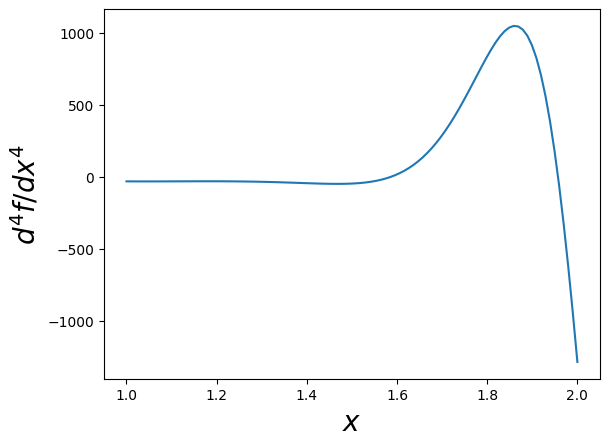

In [36]:
from matplotlib import pyplot as plt
plt.plot(x,y)
plt.ylabel('$d^4 f / dx^4$', fontsize=20)
plt.xlabel('$x$', fontsize=20)